In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import PowerTransformer, QuantileTransformer
from sklearn.model_selection import GridSearchCV

In [2]:
def get_score(true_values, predicted_values):
    mae_ = mean_absolute_error(true_values, predicted_values)
    mse_ = mean_squared_error(true_values, predicted_values)
    r2_ = r2_score(true_values, predicted_values)

    return mae_, mse_, r2_

# Loading data

### Using only values for FaceAPI without neutral gave the best result

In [3]:
dataset = pd.read_csv('dataset.csv')

In [4]:
dataset = dataset.loc[dataset['COND'] != '0']

data = dataset.iloc[:, :8]
labels = dataset.iloc[:, -2:]

In [5]:
data_train_full, data_test, labels_train_full, labels_test = train_test_split(data, labels, test_size=0.2, random_state=123)

data_train, data_validation, labels_train, labels_validation = train_test_split(data_train_full, labels_train_full, test_size=0.2, random_state=123)

data_train = data_train.loc[labels_train['ANS_AROUSAL'] != 1]
data_train = data_train.loc[labels_train['ANS_AROUSAL'] != 5]
data_train = data_train.loc[labels_train['ANS_AROUSAL'] != 9]
labels_train = labels_train.loc[labels_train['ANS_AROUSAL'] != 1]
labels_train = labels_train.loc[labels_train['ANS_AROUSAL'] != 5]
labels_train = labels_train.loc[labels_train['ANS_AROUSAL'] != 9]

data_train = data_train.loc[labels_train['ANS_VALENCE'] != 1]
data_train = data_train.loc[labels_train['ANS_VALENCE'] != 5]
data_train = data_train.loc[labels_train['ANS_VALENCE'] != 9]
labels_train = labels_train.loc[labels_train['ANS_VALENCE'] != 1]
labels_train = labels_train.loc[labels_train['ANS_VALENCE'] != 5]
labels_train = labels_train.loc[labels_train['ANS_VALENCE'] != 9]

# Scaling input values to Gaussian distributions

In [6]:
data_train.describe()

,ANGER,CONTEMPT,DISGUST,FEAR,HAPPINESS,NEUTRAL,SADNESS,SURPRISE
count,18235.000000,18235.000000,18235.000000,18235.000000,18235.000000,18235.000000,18235.000000,18235.000000
mean,0.002795,0.004721,0.000081,0.000043,0.012270,0.940769,0.035692,0.003368
std,0.019325,0.027276,0.002788,0.000926,0.086458,0.127489,0.078082,0.046189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.947000,0.001000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.986000,0.005000,0.000000
75%,0.000000,0.001000,0.000000,0.000000,0.000000,0.996000,0.030000,0.000000
max,0.768000,0.923000,0.268000,0.070000,1.000000,1.000000,0.941000,1.000000


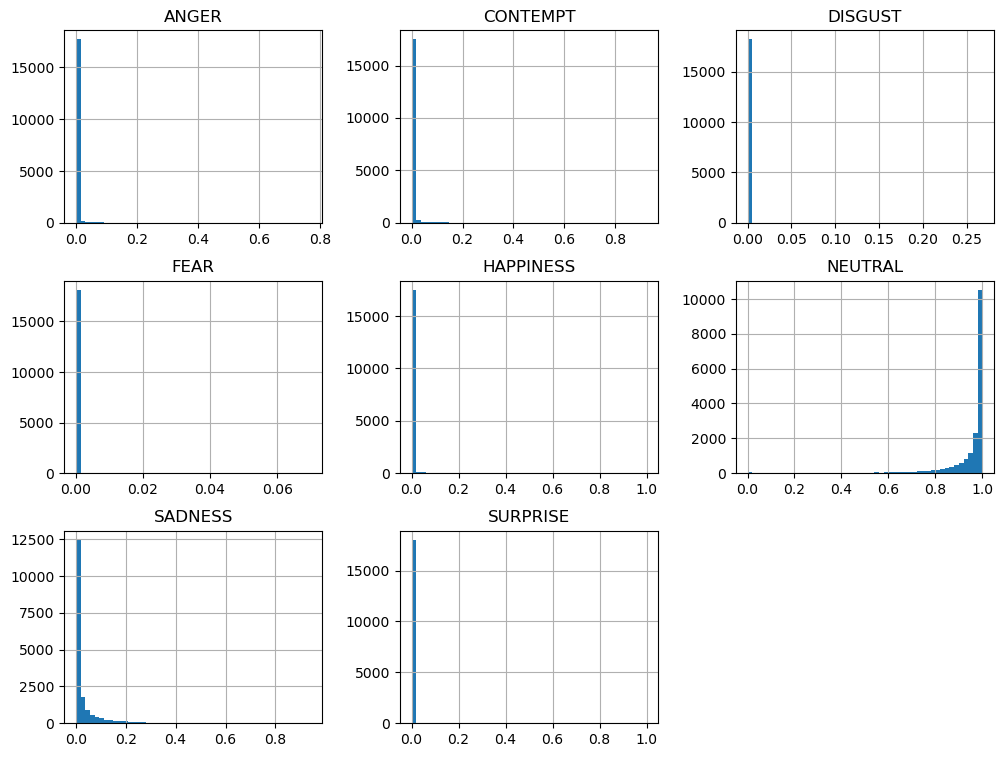

In [7]:
data_train.hist(bins=50, figsize=(12, 9))
plt.show()

In [8]:
pt = PowerTransformer(method='yeo-johnson', standardize=True)
data_train_transformed = pt.fit_transform(data_train)

In [9]:
data_train_transformed = pd.DataFrame(data_train_transformed, columns=data_train.columns)

data_train_transformed.describe()

,ANGER,CONTEMPT,DISGUST,FEAR,HAPPINESS,NEUTRAL,SADNESS,SURPRISE
count,1.823500e+04,1.823500e+04,1.823500e+04,1.823500e+04,1.823500e+04,1.823500e+04,1.823500e+04,1.823500e+04
mean,1.912564e-15,6.593757e-18,-8.357328e-16,1.719491e-16,-1.671880e-16,-9.329892e-17,-7.754818e-17,9.786949e-16
std,1.000027e+00,1.000027e+00,1.000027e+00,1.000027e+00,1.000027e+00,1.000027e+00,1.000027e+00,1.000027e+00
min,-4.775403e-01,-6.222300e-01,-1.374258e-01,-1.266777e-01,-2.802464e-01,-2.277621e+00,-8.747181e-01,-2.950090e-01
25%,-4.775403e-01,-6.222300e-01,-1.374258e-01,-1.266777e-01,-2.802464e-01,-5.721686e-01,-8.028725e-01,-2.950090e-01
50%,-4.775403e-01,-6.222300e-01,-1.374258e-01,-1.266777e-01,-2.802464e-01,4.404978e-01,-5.330378e-01,-2.950090e-01
75%,-4.775403e-01,-4.579335e-02,-1.374258e-01,-1.266777e-01,-2.802464e-01,7.810515e-01,6.573512e-01,-2.950090e-01
max,3.352813e+00,3.116337e+00,7.276668e+00,7.894047e+00,4.631565e+00,9.284041e-01,2.105786e+00,5.395729e+00


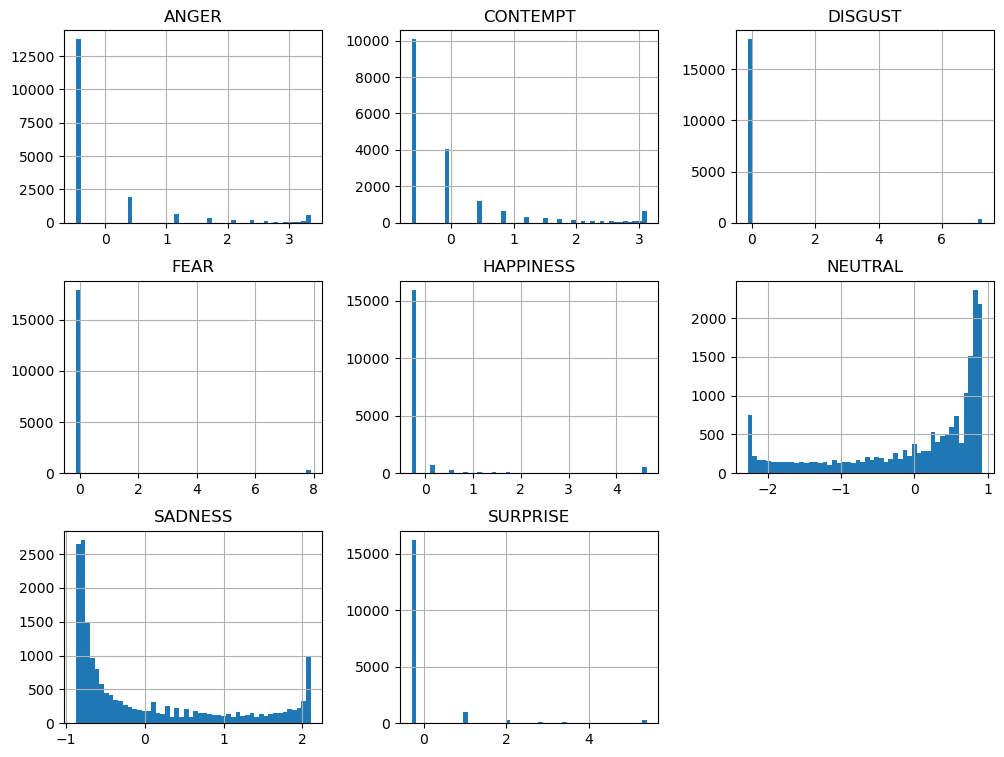

In [10]:
data_train_transformed.hist(bins=50, figsize=(12, 9))
plt.show()

In [11]:
data_validation_transformed = pt.fit_transform(data_validation)
data_validation_transformed = pd.DataFrame(data_validation_transformed, columns=data_validation.columns)

In [12]:
quantile_transformer = QuantileTransformer(output_distribution='normal', random_state=0)
data_train_qt = quantile_transformer.fit_transform(data_train)
data_train_qt = pd.DataFrame(data_train_qt, columns=data_train.columns)
data_train_qt.describe()

,ANGER,CONTEMPT,DISGUST,FEAR,HAPPINESS,NEUTRAL,SADNESS,SURPRISE
count,18235.000000,18235.000000,18235.000000,18235.000000,18235.000000,18235.000000,18235.000000,18235.000000
mean,-3.603317,-2.474846,-5.057970,-5.077701,-4.351186,0.069205,-0.527479,-4.436938
std,2.801253,3.046564,1.029587,0.961053,2.264005,1.257895,2.065802,2.169179
min,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338
25%,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-0.673702,-0.773140,-5.199338
50%,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-0.008782,-0.028859,-5.199338
75%,-5.199338,0.418371,-5.199338,-5.199338,-5.199338,0.602943,0.676854,-5.199338
max,5.199338,5.199338,5.199338,5.199338,5.199338,5.199338,5.199338,5.199338


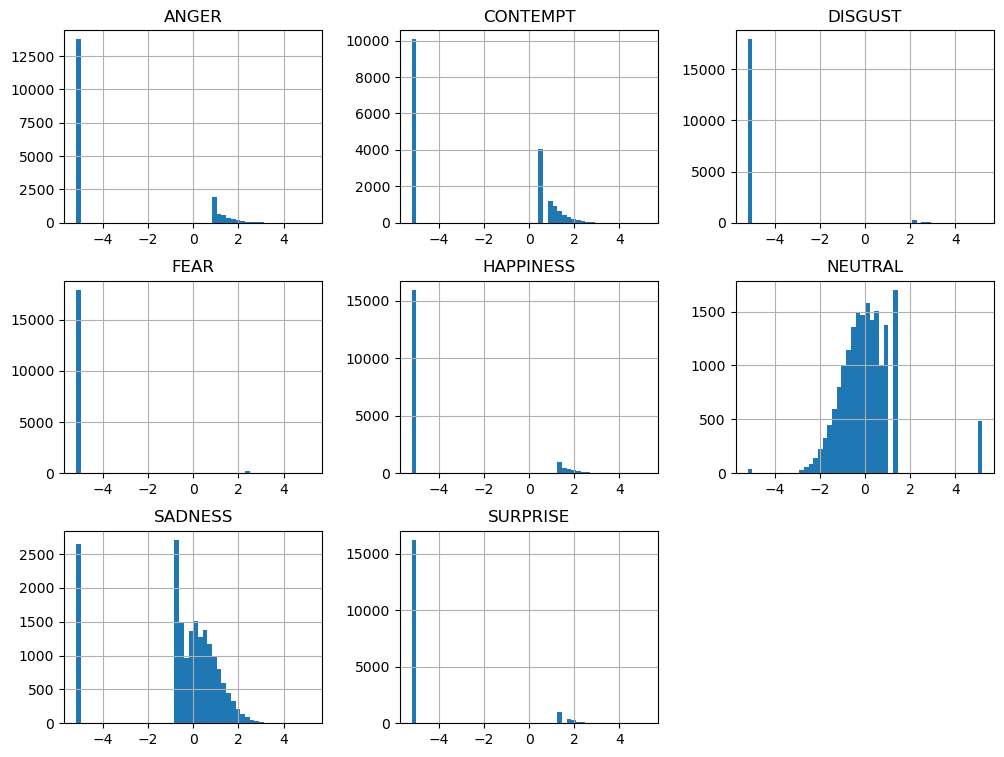

In [13]:
data_train_qt.hist(bins=50, figsize=(12, 9))
plt.show()

# No scaling

In [14]:
rfr = RandomForestRegressor(random_state=0)

rfr.fit(data_train, labels_train.iloc[:, 1])
print('Training finished')

Training finished


In [15]:
predictions = rfr.predict(data_validation)

mae, mse, r2 = get_score(labels_validation.iloc[:, 1], predictions)
print(f'''Values for validation set:\nMAE: {mae}\nMSE: {mse}\nRMSE: {mse**.5}\nR2:  {r2}''')

Values for validation set:
MAE: 1.6567921005346171
MSE: 4.3473772459589135
RMSE: 2.0850365095026304
R2:  -0.09282751036062264


# Transformed

In [16]:
rfr_transformed = RandomForestRegressor(random_state=0)

rfr_transformed.fit(data_train_transformed, labels_train.iloc[:, 1])
print('Training finished')

Training finished


In [17]:
predictions_transformed = rfr_transformed.predict(data_validation)

mae_transformed, mse_transformed, r2_transformed = get_score(labels_validation.iloc[:, 1], predictions_transformed)
print(f'''Values for validation set:\nMAE: {mae_transformed}\nMSE: {mse_transformed}\nRMSE: {mse_transformed**.5}\nR2:  {r2_transformed}''')

Values for validation set:
MAE: 1.6739691275891224
MSE: 4.308680782635265
RMSE: 2.075736202564108
R2:  -0.08310013744559597


In [18]:
predictions_transformed2 = rfr_transformed.predict(data_validation_transformed)

mae_transformed2, mse_transformed2, r2_transformed2 = get_score(labels_validation.iloc[:, 1], predictions_transformed2)
print(f'''Values for validation set:\nMAE: {mae_transformed2}\nMSE: {mse_transformed2}\nRMSE: {mse_transformed2**.5}\nR2:  {r2_transformed2}''')

Values for validation set:
MAE: 1.6498451586005454
MSE: 4.270307328802715
RMSE: 2.0664721940550552
R2:  -0.07345396145414163


# Quantile Transformed

In [19]:
rfr_qt = RandomForestRegressor(random_state=0)

rfr_qt.fit(data_train_qt, labels_train.iloc[:, 1])
print('Training finished')

Training finished


In [20]:
predictions_qt = rfr_qt.predict(data_validation)

mae_qt, mse_qt, r2_qt = get_score(labels_validation.iloc[:, 1], predictions_qt)
print(f'''Values for validation set:\nMAE: {mae_qt}\nMSE: {mse_qt}\nRMSE: {mse_qt**.5}\nR2:  {r2_qt}''')

Values for validation set:
MAE: 1.6785753667536143
MSE: 4.3327854244618775
RMSE: 2.0815343918518083
R2:  -0.08915947258611046


### Checking if Extremely Randomized Forest does better

In [21]:
etr = ExtraTreesRegressor(random_state=0)

etr.fit(data_train_qt, labels_train.iloc[:, 1])
print('Training finished')

Training finished


In [22]:
predictions_etr = etr.predict(data_validation)

mae_etr, mse_etr, r2_etr = get_score(labels_validation.iloc[:, 1], predictions_etr)
print(f'''Values for validation set:\nMAE: {mae_etr}\nMSE: {mse_etr}\nRMSE: {mse_etr**.5}\nR2:  {r2_etr}''')

Values for validation set:
MAE: 1.5900645056260838
MSE: 3.9940640298154784
RMSE: 1.9985154564865086
R2:  -0.004012949182514269


# Optimizing parameters

In [42]:
param_grid = [{
    'n_estimators': [100, 200, 300, 400, 500],
    'min_samples_split': [2, 4, 8, 16, 32],
    'min_samples_leaf': [1, 2, 4, 8, 16]
}]

In [43]:
clf = GridSearchCV(estimator=etr, param_grid=param_grid, scoring='neg_root_mean_squared_error', n_jobs=2, cv=3, verbose=1)
clf.fit(data_train, labels_train.iloc[:, 1])
print('Search finished')

Fitting 3 folds for each of 125 candidates, totalling 375 fits
Search finished


In [44]:
clf.best_params_

{'min_samples_leaf': 16, 'min_samples_split': 2, 'n_estimators': 500}

In [45]:
predictions_clf = clf.predict(data_validation)

mae_clf, mse_clf, r2_clf = get_score(labels_validation.iloc[:, 1], predictions_clf)
print(f'''Values for validation set:\nMAE: {mae_clf}\nMSE: {mse_clf}\nRMSE: {mse_clf**.5}\nR2:  {r2_clf}''')

Values for validation set:
MAE: 1.587590772664349
MSE: 4.000424917580229
RMSE: 2.000106226574036
R2:  -0.0056119254724367185


### Using best parameters

In [46]:
etr_best = ExtraTreesRegressor(n_estimators=500, min_samples_split=2, min_samples_leaf=16, random_state=0, n_jobs=2)

etr_best.fit(data_train_qt, labels_train.iloc[:, 1])
print('Training finished')

Training finished


In [47]:
predictions_etr_best = etr_best.predict(data_validation)

mae_etr_best, mse_etr_best, r2_etr_best = get_score(labels_validation.iloc[:, 1], predictions_etr_best)
print(f'''Values for validation set:\nMAE: {mae_etr_best}\nMSE: {mse_etr_best}\nRMSE: {mse_etr_best**.5}\nR2:  {r2_etr_best}''')

Values for validation set:
MAE: 1.5869446992324707
MSE: 3.9870712555019683
RMSE: 1.9967651978893182
R2:  -0.0022551316039614022


# Using full dataset

In [3]:
dataset = pd.read_csv('dataset_full.csv')
dataset = dataset.loc[dataset['COND'] != '0']

data = dataset.iloc[:, :8]
labels = dataset.iloc[:, -2:]
data_train_full, data_test, labels_train_full, labels_test = train_test_split(data, labels, test_size=0.2,
                                                                              random_state=123)

data_train, data_validation, labels_train, labels_validation = train_test_split(data_train_full, labels_train_full,
                                                                                test_size=0.2, random_state=123)

data_train = data_train.loc[labels_train['ANS_AROUSAL'] != 1]
data_train = data_train.loc[labels_train['ANS_AROUSAL'] != 5]
data_train = data_train.loc[labels_train['ANS_AROUSAL'] != 9]
labels_train = labels_train.loc[labels_train['ANS_AROUSAL'] != 1]
labels_train = labels_train.loc[labels_train['ANS_AROUSAL'] != 5]
labels_train = labels_train.loc[labels_train['ANS_AROUSAL'] != 9]

data_train = data_train.loc[labels_train['ANS_VALENCE'] != 1]
data_train = data_train.loc[labels_train['ANS_VALENCE'] != 5]
data_train = data_train.loc[labels_train['ANS_VALENCE'] != 9]
labels_train = labels_train.loc[labels_train['ANS_VALENCE'] != 1]
labels_train = labels_train.loc[labels_train['ANS_VALENCE'] != 5]
labels_train = labels_train.loc[labels_train['ANS_VALENCE'] != 9]

In [4]:
quantile_transformer = QuantileTransformer(output_distribution='normal', random_state=0)
data_train_qt = quantile_transformer.fit_transform(data_train)
data_train_qt = pd.DataFrame(data_train_qt, columns=data_train.columns)

In [5]:
etr_best = ExtraTreesRegressor(n_estimators=500, min_samples_split=2, min_samples_leaf=16, random_state=0, n_jobs=2)

etr_best.fit(data_train_qt, labels_train.iloc[:, 1])
print('Training finished')

Training finished


In [6]:
predictions_etr_best = etr_best.predict(data_validation)

mae_etr_best, mse_etr_best, r2_etr_best = get_score(labels_validation.iloc[:, 1], predictions_etr_best)
print(f'''Values for validation set:\nMAE: {mae_etr_best}\nMSE: {mse_etr_best}\nRMSE: {mse_etr_best**.5}\nR2:  {r2_etr_best}''')

Values for validation set:
MAE: 1.6064986453229773
MSE: 4.07394007717225
RMSE: 2.018400375835342
R2:  -0.0009042356826258757
